In [3]:
#-*- coding : utf-8-*-
# coding:unicode_escape
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.signal as sci
import pandas as pd
path ="./data/newdata"
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）

['B0_70-100.CSV', 'B0_90-70.CSV', 'B1.5A_70-99.CSV', 'B1.5A_99-65.CSV', 'B3A_65-99.CSV', 'B3A_99-65.CSV', 'B5A_65-99.CSV', 'B5A_99-70.CSV']


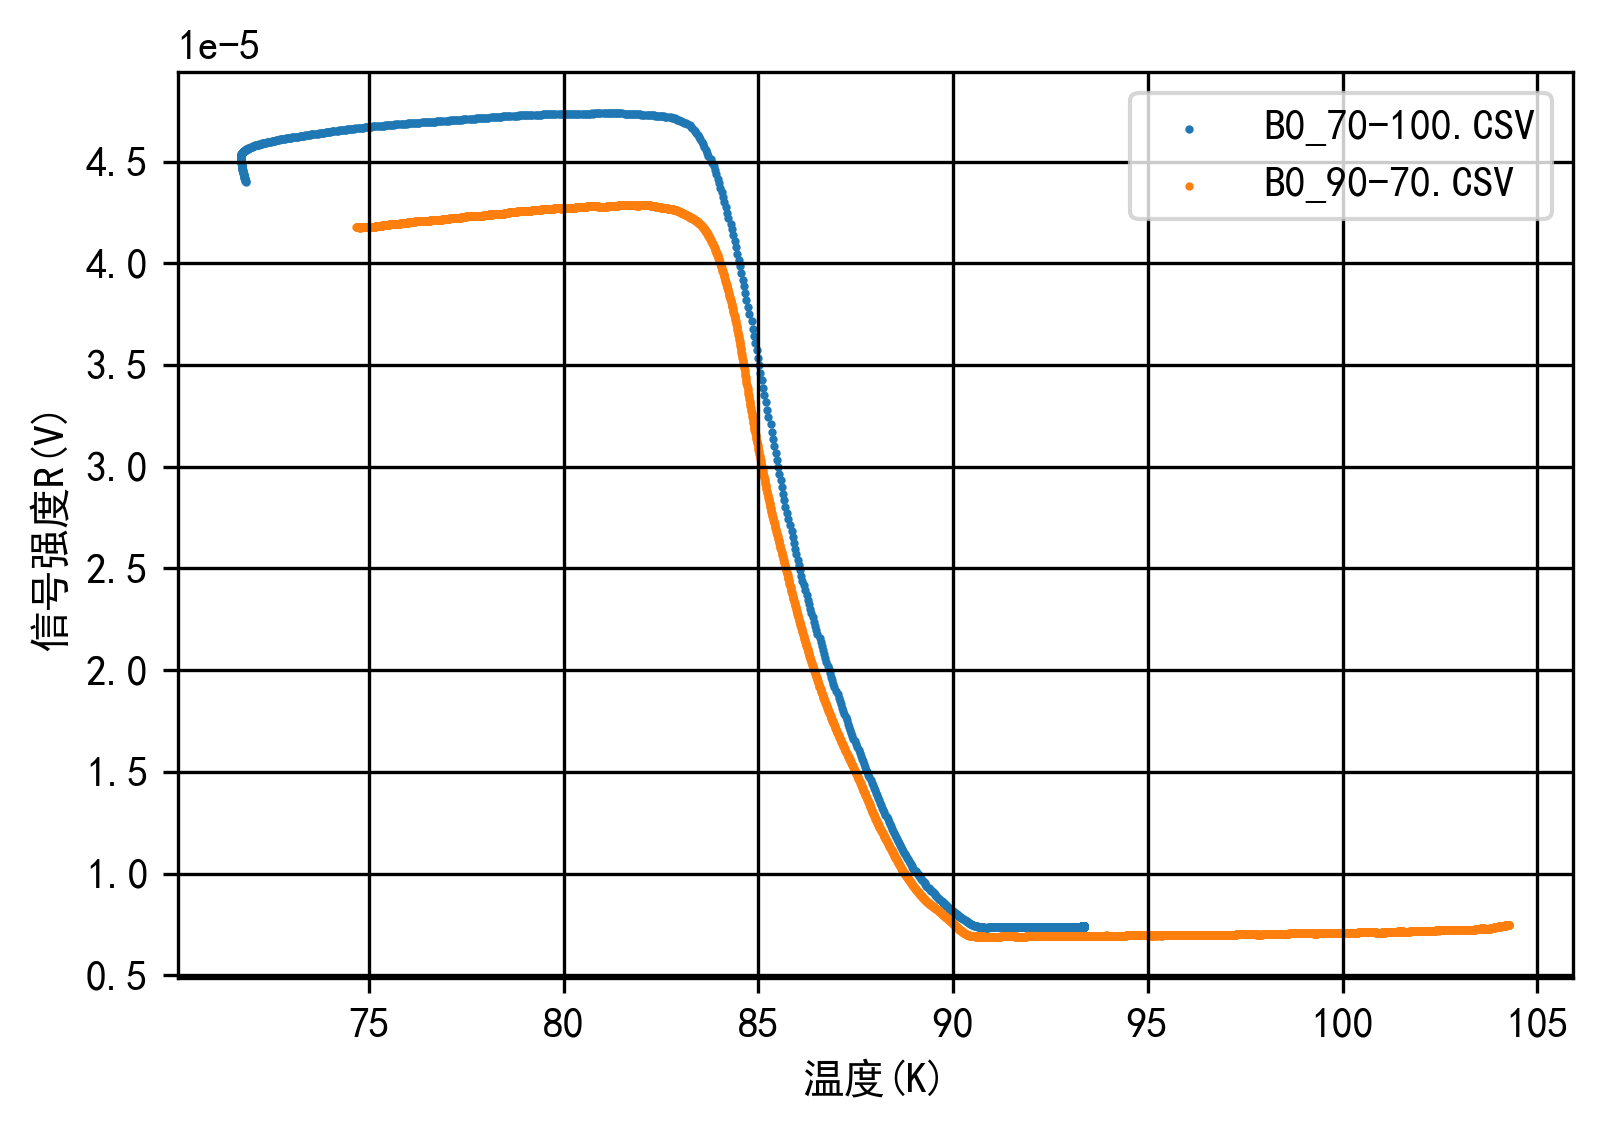

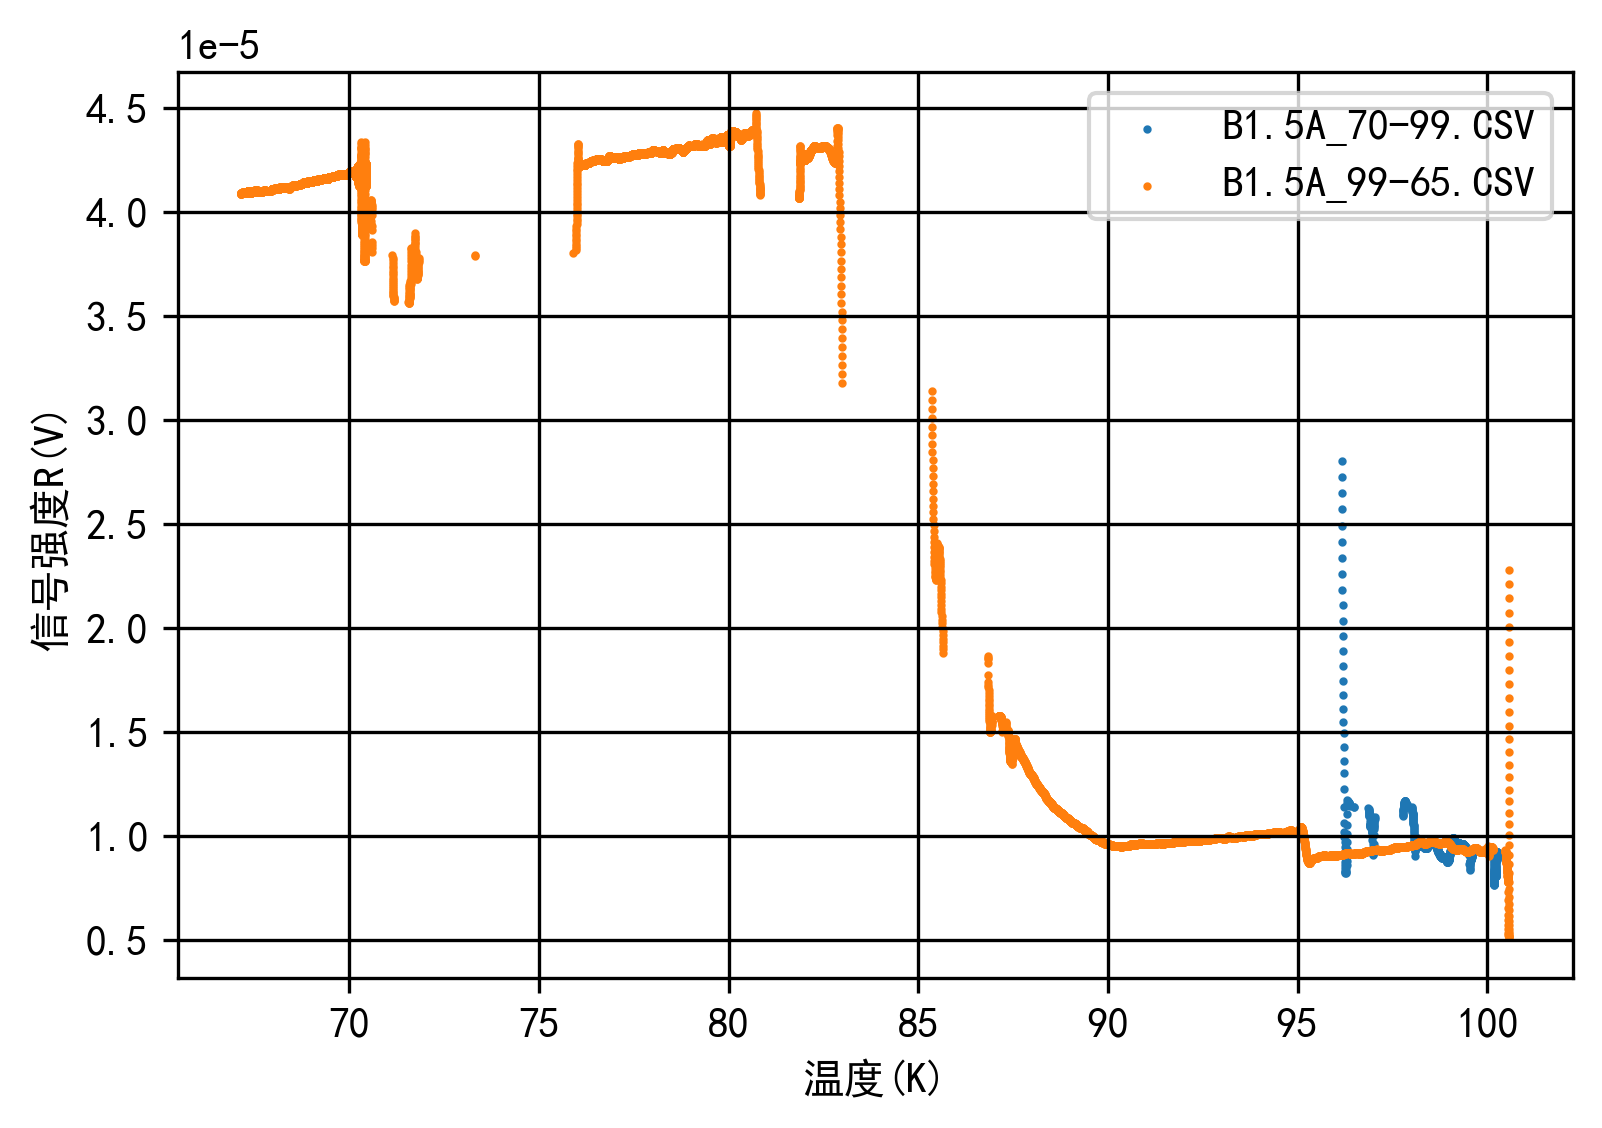

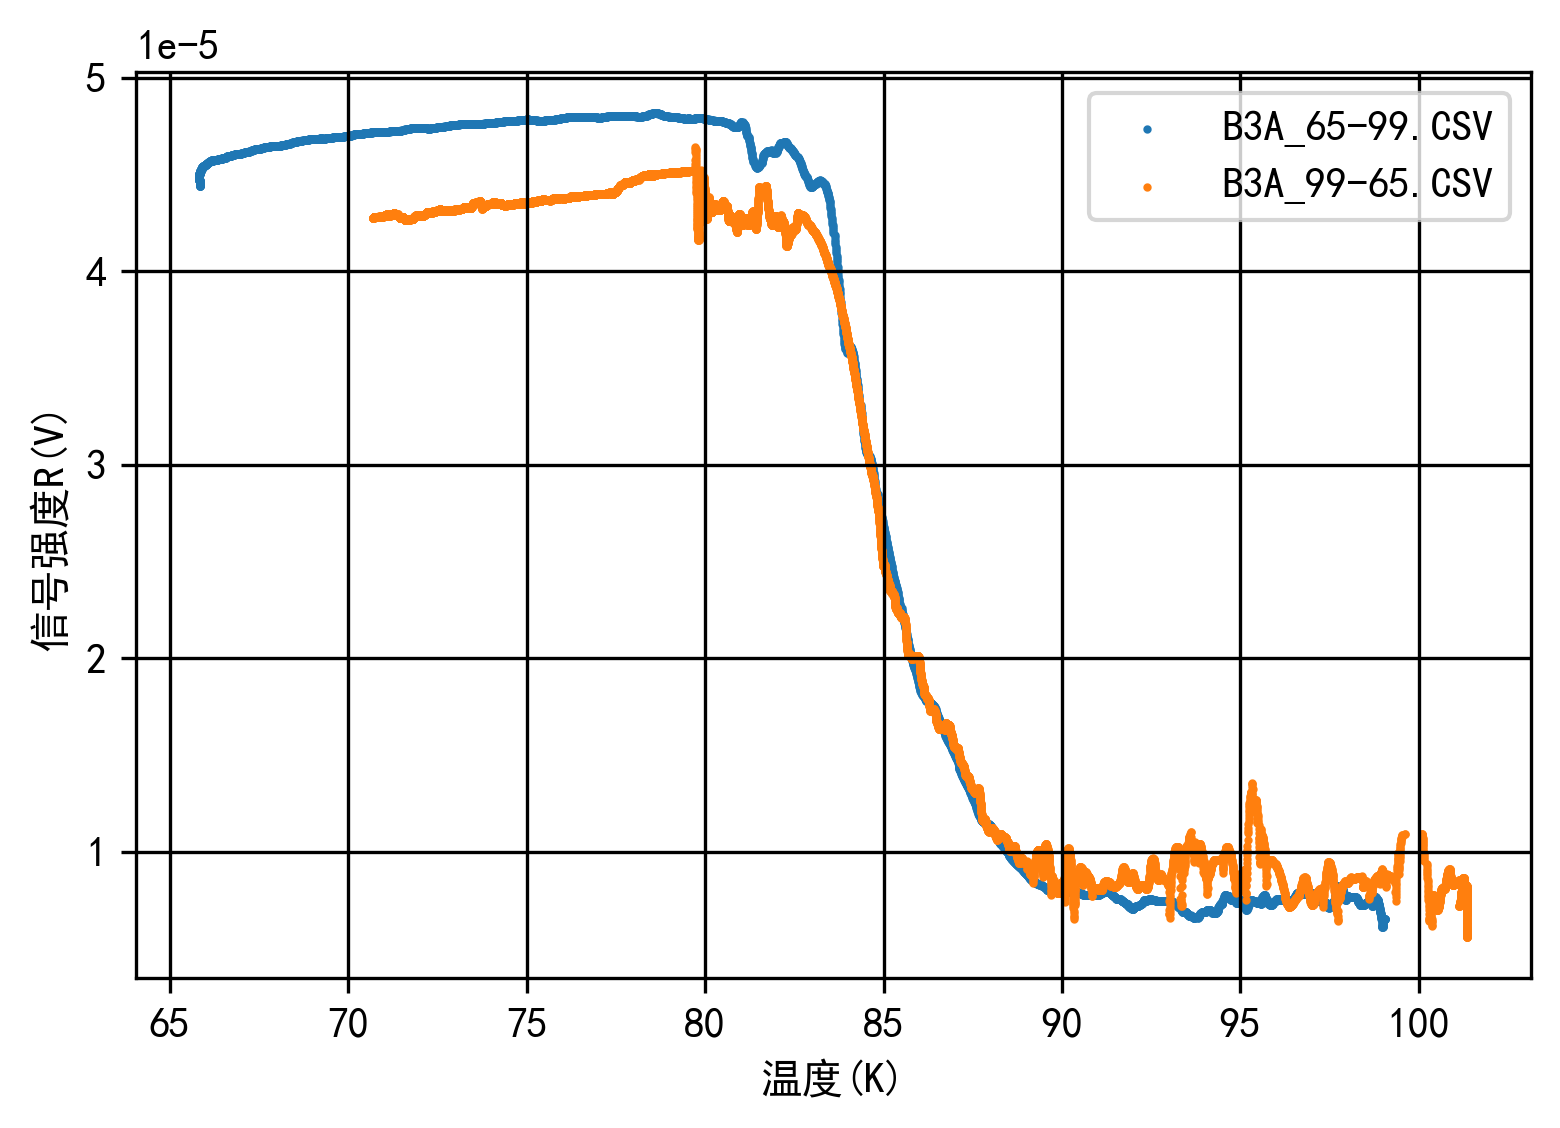

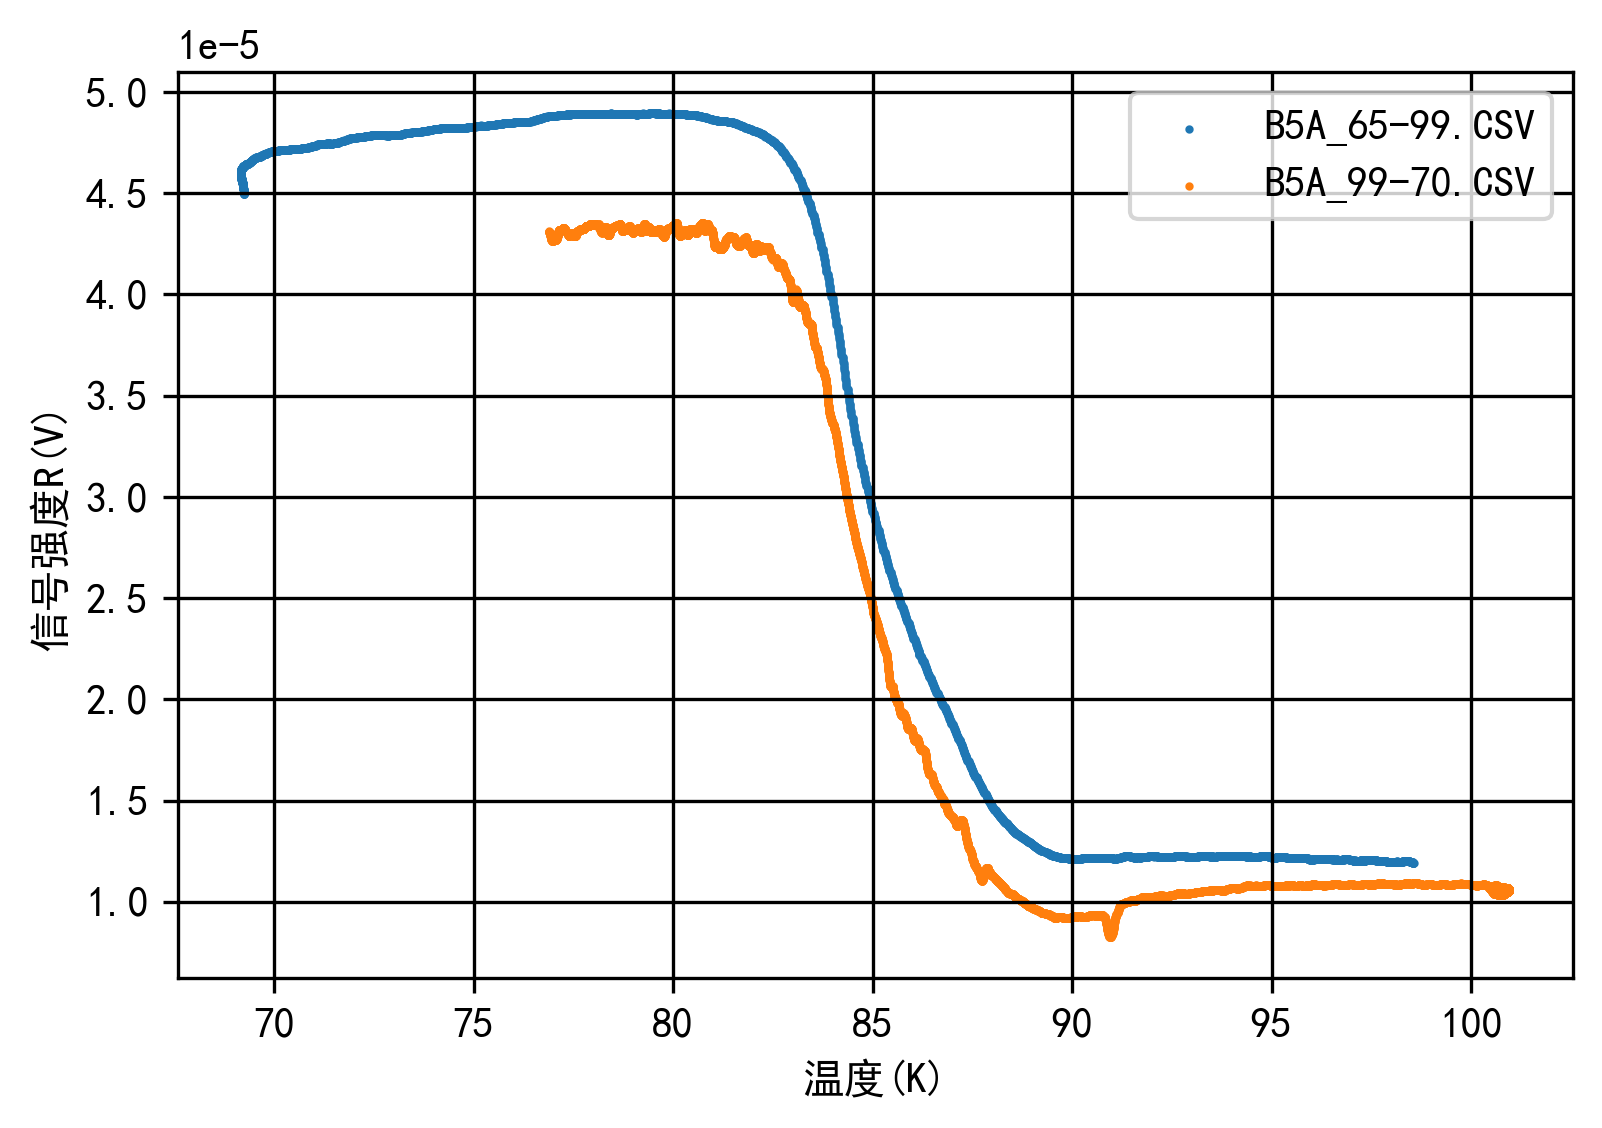

In [4]:
files = os.listdir(path)
print(files)
j=0
for i in files:
    h=pd.read_csv(path+"/"+i,skiprows=3,usecols=[0,8],encoding="unicode_escape")
    tem=h.values
    temt=0.2335*tem[:,1]+30.15
    index=np.where(tem[:,0]<5e-5)
    tem=sci.savgol_filter(tem[index,0],97,3,mode="nearest")
    if j%2==0:
        plt.figure(dpi=300)
    plt.scatter(temt[index],tem,s=1,label=i)
    plt.xlabel("温度(K)")
    plt.ylabel("信号强度R(V)")
    plt.legend()
    plt.grid(c="k")
    j+=1
    plt.savefig('./png/'+str(j)+".png")

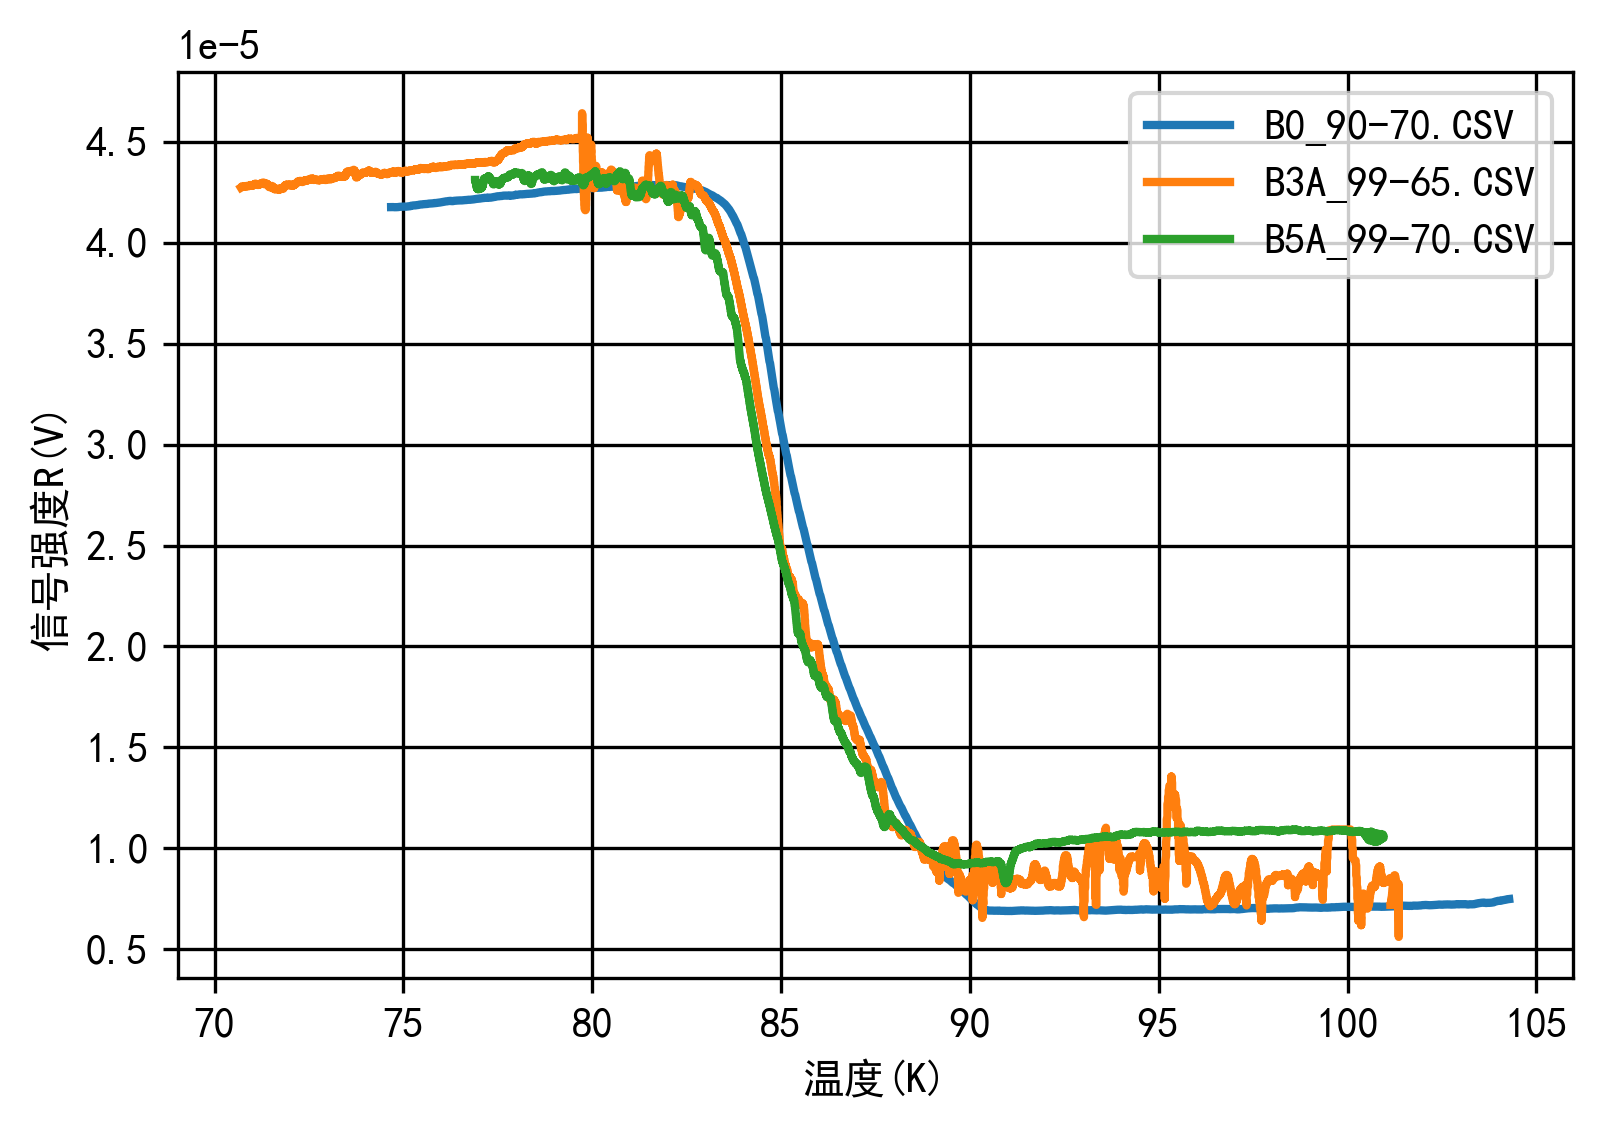

In [5]:

plt.figure(dpi=300)
j=0
for i in files:
    if j==1 or j==5 or j==7:
        h=pd.read_csv(path+"/"+i,skiprows=3,usecols=[0,8],encoding="unicode_escape")
        tem=h.values
        temt=0.2335*tem[:,1]+30.15
        index=np.where(tem[:,0]<5e-5)
        tem=sci.savgol_filter(tem[index,0],97,3,mode="nearest")
        plt.plot(temt[index],tem.reshape(-1),lw=2,label=i)
        plt.xlabel("温度(K)")
        plt.ylabel("信号强度R(V)")
        plt.legend()
    plt.grid(c="k")
    j+=1
    
plt.xlabel("温度(K)")
plt.ylabel("信号强度R(V)")
plt.legend()
plt.grid(c="k")
plt.savefig('./png/'+str(j+2)+".png")

0.9135430827992493 -0.0020129474978960392


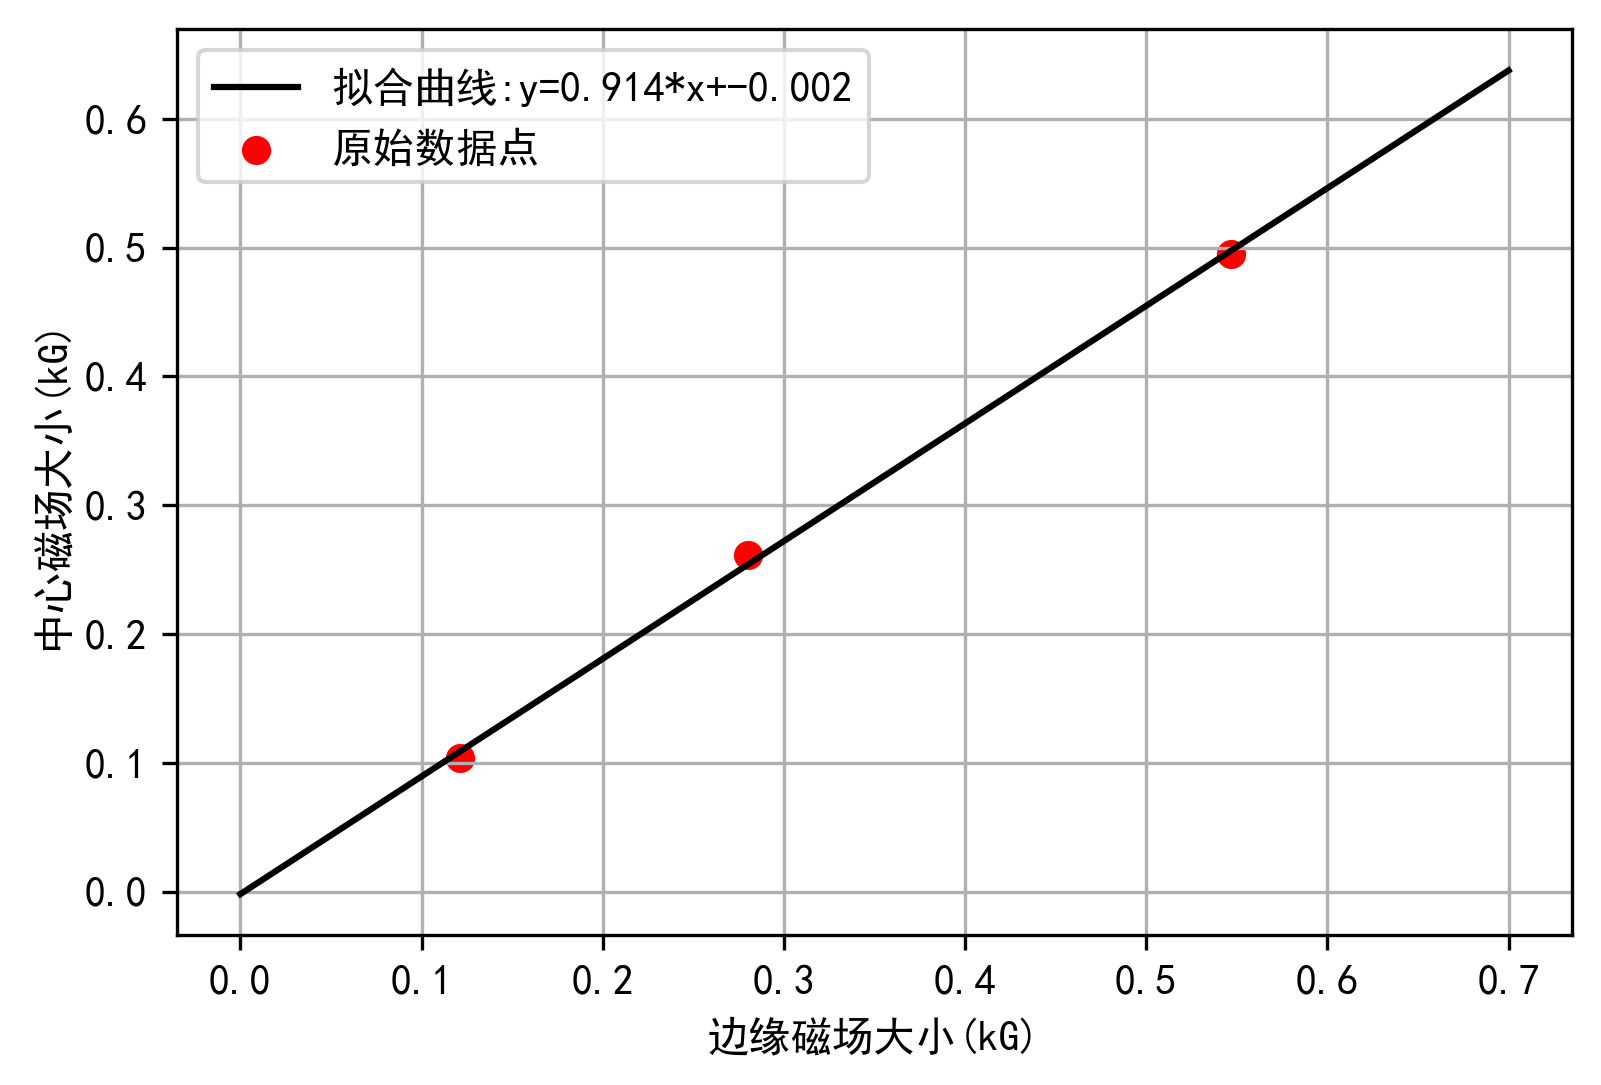

In [21]:
cen=np.array([0.104,0.261,0.495])
edg=np.array([0.121,0.28,0.547])
a,b=np.polyfit(edg,cen,1)
print(a,b)
t=np.linspace(0,0.7,1000)
y=a*t+b
plt.figure(dpi=300)
plt.plot(t,y,c='k',label='拟合曲线:y=0.914*x+-0.002')
plt.scatter(edg,cen,c="r",label="原始数据点")
plt.xlabel("边缘磁场大小(kG)")
plt.ylabel("中心磁场大小(kG)")
plt.grid()
plt.legend()
plt.savefig("./png/q1.png")
